In [25]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

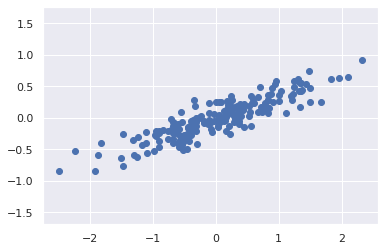

In [26]:
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2,2), rng.randn(2,200)).T
plt.scatter(X[:,0], X[:,1])
plt.axis('equal');

In [32]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [33]:
X.shape

(200, 2)

In [34]:
pca.components_[0]

array([-0.94446029, -0.32862557])

In [35]:
print(pca.components_)

[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]


In [36]:
print(pca.explained_variance_)

[0.7625315 0.0184779]


Visualizing the adjusted projections made by PCA, as vectors over the original data, using its 'components' to define de vectors direction and the explained variance to define the size of the vectors


In [43]:
def draw_vector(v0,v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                   linewidth=2,
                   shrinkA=0, shrinkB=0, color='black')
    ax.annotate('', v1,v0, arrowprops=arrowprops)
    

(-2.7391278364515688,
 2.5801310701596343,
 -0.9477947579593762,
 1.019590430670684)

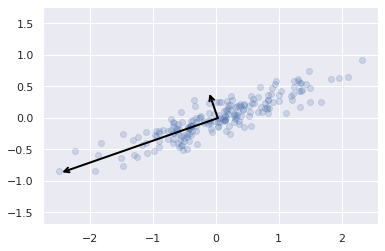

In [44]:
plt.scatter(X[:,0],X[:,1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v= vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_,pca.mean_+v)
plt.axis('equal')    

[(-2, 2.1),
 Text(0, 0.5, 'Component 2'),
 (-2, 2),
 Text(0.5, 0, 'Component 1'),
 Text(0.5, 1.0, 'Principal components')]

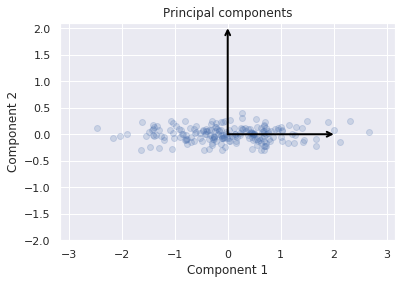

In [46]:
fig, ax =plt.subplots(1,1)
X_pca = pca.transform(X)
ax.scatter(X_pca[:,0], X_pca[:,1], alpha=0.2)
draw_vector([0,0],[0,2], ax=ax)
draw_vector([0,0], [2,0], ax=ax)
ax.axis('equal')
ax.set(xlabel='Component 1', ylabel='Component 2',
       title='Principal components',
       xlim=(-2,2), ylim=(-2,2.1))
       



*Analysis with iris data*

In [48]:
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Reescaling data

In [50]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

char = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
x=iris.loc[:,char].values
y=iris['species'].values
enc=LabelEncoder()
label_encoder=enc.fit(y)
y = label_encoder.transform(y)+1

x=StandardScaler().fit_transform(x)
x[:5,:]



array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ]])

In [ ]:
pca2= PCA